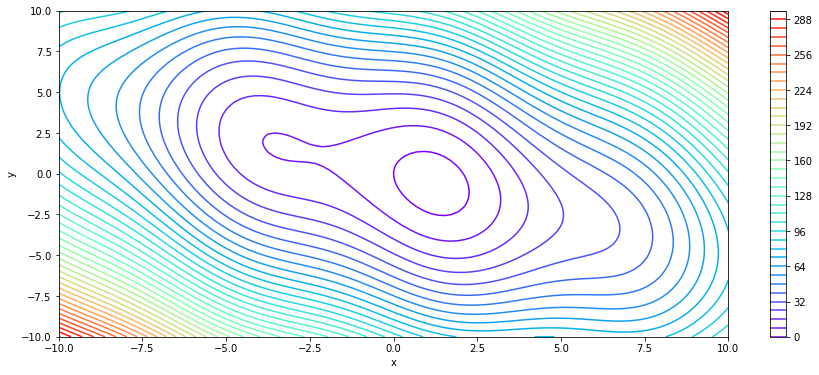

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x, y)
plt.figure(figsize=(15, 6))
plt.contour(x, y, x**2 + y**2 + x*y - np.sin(x)*5, 50, cmap=plt.cm.rainbow)
plt.colorbar()
plt.xlabel("x")
plt.ylabel('y')
plt.savefig('../../assets/images/markdown_img/180614_1926_contour_for_optm.svg')
plt.show()

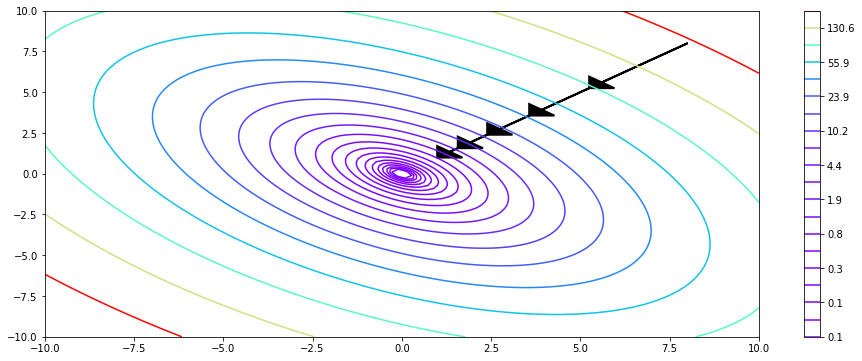

In [63]:
import sympy 
import numpy as np 
import matplotlib.pyplot as plt

x, y = sympy.symbols('x y')
f = x**2 + y**2 +x*y
f_diff_by_x = sympy.diff(f, x)
f_diff_by_y = sympy.diff(f, x)

sample_size = 100
xs = np.linspace(-10, 10, sample_size)
ys = np.linspace(-10, 10, sample_size)
xs, ys = np.meshgrid(xs, ys)
zs = [float(f.subs(x, xv).subs(y, yv)) for xv, yv in zip(xs.ravel(), ys.ravel())]
zs = np.array(zs).reshape(sample_size, sample_size)

plt.figure(figsize=(16, 6))
plt.contour(xs, ys, zs, 50, levels = np.logspace(-1.2, 2.3, 20), cmap=plt.cm.rainbow)


curr_p = np.array([8.0, 8.0])
step = -0.1

for i in range(0, 5):
    #plt.scatter(curr_p[0], curr_p[1], marker='o', s=100, color='red')
    dx = float(f_diff_by_x.subs(x, curr_p[0]).subs(y, curr_p[1]).evalf())*step
    dy = float(f_diff_by_y.subs(x, curr_p[0]).subs(y, curr_p[1]).evalf())*step
    dxy = np.array([dx, dy])
    plt.arrow(curr_p[0], curr_p[1], dx=dx, dy=dy, head_width=1, head_length=0.5, fc='k', ec='k', lw=2)
    curr_p +=dxy
    #plt.scatter(curr_p[0], curr_p[1], marker='o', s=100, color='red')
#head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
plt.colorbar()
plt.savefig('../../assets/images/markdown_img/180614_2035_gradient_descent_arrow.svg')
plt.show()

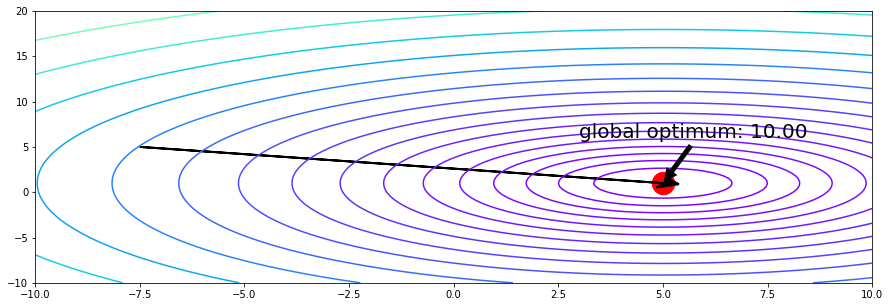

In [181]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np 

def f_xy(xy):# input should be ndarray 
    r = xy + np.array([-5, -1])
    return r.dot(r) + 10

sample_size = 100 
xs = np.linspace(-10, 10, sample_size)
ys = np.linspace(-10, 20, sample_size)

xs, ys = np.meshgrid(xs, ys)
zs = np.array([f_xy(np.array([x, y])) for x, y in zip(xs.ravel(), ys.ravel())]).reshape(sample_size, sample_size)

plt.figure(figsize=(15, 5))
plt.contour(xs, ys, zs, levels = np.logspace(1, 3, 20), cmap=plt.cm.rainbow) # draw

# optimization 
x0 = np.array([-7.5, 5])  # 초기값
result = sp.optimize.minimize(f_xy, x0) # optimization

if result['success']==True:
    x_opt, y_opt = result['x']
    plt.annotate('global optimum: {:.2f}'.format(result['fun']), xy=(x_opt, y_opt), xytext=(x_opt-2, y_opt+5), 
                 fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05, linewidth=1),
                )
    plt.scatter(x_opt, y_opt, s=500, color='red')
    plt.arrow(x0[0], x0[1], x_opt-x0[0], y_opt-x0[1],
              head_width=1, head_length=0.4, fc='k', ec='k', lw=2)
#plt.colorbar() 
# plt.scatter를 쓸 경우에, plt.colorbar는 쓸 수 없음 
plt.savefig('../../assets/images/markdown_img/180615_1514_optimization_contour.svg')
plt.show()

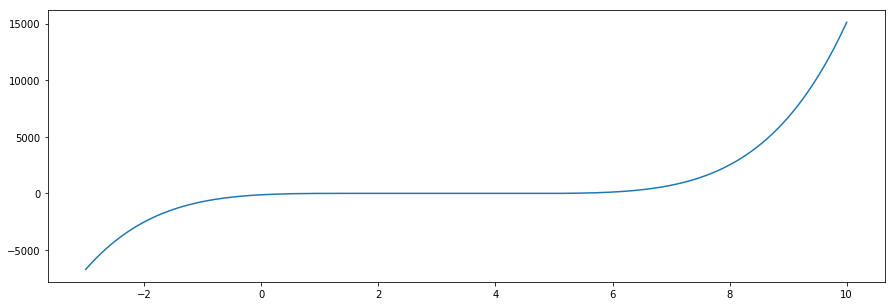

      fun: -6.173052363270945e+42
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 1
     njev: 16
   status: 0
  success: True
        x: array([ -3.61493080e+08])


In [133]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np 

def f_x(x):# input should be ndarray 
    r = 1
    for s in [1, 2, 3, 4, 5]:
        r *=(x-s)
    return r
xs = np.linspace(-3, 10, 300)
ys = np.array([f_x(x) for x in xs])

plt.figure(figsize=(15, 5))
plt.plot(xs, ys)
plt.show()

x0 = 0  # 초기값
result = sp.optimize.minimize(f_x, 0)
"""
x: 최적화 해
success: 최적화에 성공하면 True를 반환
status: 종료 상태. 최적화에 성공하면 0을 반환
message: 메세지 문자열
fun: x 위치에서의 함수의 값
jac: x 위치에서의 자코비안(그레디언트) 벡터의 값

hess: x 위치에서의 헤시안 행렬의 값
nfev: 목적함수 호출 횟수
njev: 자코비안 계산 횟수
nhev: 헤시안 계산 횟수
nit: x 이동 횟수
"""
print(result)

In [ ]:
np.